Demonstrate a frequency scan of a simulated resonance.

This follows the steps in ../zcu216/mkids_2x2_kidsim_v2.ipynb, but should work in general on all platforms.
The parameter "bitfile" is set to select the firmware used, and it should work with all available firmwares.
Note that the previous demo_00_init.ipynb show how to find available firmwares on the platform.


For this notebook, we use the "Dual 0" chain for mkids software.  I

On the ZCU216 the bitfile mkids_2x2_kidsim_v2 uses these connections:
* DAC output on DAC Tile = 2, DAC Ch = 0, which is the connector 0_230, on JHC3
* ADC input on ADC Tile = 2, ADC Ch = 0, which is the connector 0_226, on JHC7

We use the "Sim 0" chain to simulate the resonance.  It uses these connections:
* DAC output on DAC Tile = 3, DAC Ch = 0, which is the connector 0_231, on JHC3
* ADC input on ADC Tile = 3, ADC Ch = 0, which is the connector 0_227, on JHC7

These are connected through the low-frequency Baluns.

On the ZCU111 the bitfile mkids_2x2_kidsim_v1 uses these connections:

* DAC 229_CH0 -> ADC 224_CH1
* DAC 229_CH1 -> ADC 224_CH0



 

In [1]:
import sys
sys.path.append('../../../qick/qick_lib/')
sys.path.append('../soft/')
import Scan
from mkids import *
import matplotlib.pyplot as plt


In [2]:
board = Scan.getBoard()
if board == 'zcu111':
    bitfile = 'mkids_2x2_kidsim_v1'
    fMixerSimu = 1024
    fResonance = 805
    fMixerKids = 1024
    fc = 800
    df = 20
elif board == 'zcu216':
    bitfile = 'mkids_2x2_kidsim_v2'
    fMixerSimu = 1000
    fResonance = 950
    fMixerKids = 1000
    fc = 945
    df = 20
else:
    raise Exception("Do not know what to do with %s"%board)
    

In [3]:
scan = Scan.Scan(bitfile)

In [4]:
# Confirm what we have available
print("bitfile =",bitfile)
print(scan.soc)


bitfile = mkids_2x2_kidsim_v2

QICK configuration:

	Board: ZCU216

	Analysis Chains
	0:	 Analysis Chain: ADC Tile = 3, ADC Ch = 0, fs = 614.400 MHz, Number of Channels = 256 
	1:	 Analysis Chain: ADC Tile = 3, ADC Ch = 2, fs = 614.400 MHz, Number of Channels = 256 
	2:	 Analysis Chain: ADC Tile = 2, ADC Ch = 0, fs = 614.400 MHz, Number of Channels = 64 
	3:	 Analysis Chain: ADC Tile = 2, ADC Ch = 2, fs = 614.400 MHz, Number of Channels = 64 

	Synthesis Chains
	0:	 Synthesis Chain: DAC Tile = 3, DAC Ch = 0, fs = 614.400 MHz, Number of Channels = 256 
	1:	 Synthesis Chain: DAC Tile = 3, DAC Ch = 2, fs = 614.400 MHz, Number of Channels = 256 
	2:	 Synthesis Chain: DAC Tile = 2, DAC Ch = 0, fs = 614.400 MHz, Number of Channels = 64 
	3:	 Synthesis Chain: DAC Tile = 2, DAC Ch = 2, fs = 614.400 MHz, Number of Channels = 64 

	Dual Chains
	Dual 0: 
		Analysis : ADC Tile = 2, ADC Ch = 0, fs = 614.400 MHz, Number of Channels = 64
		Synthesis: DAC Tile = 2, DAC Ch = 0, fs = 614.400 MHz, Number

In [5]:
# Get the simulation chain.
#simu = SimuChain(scan.soc, simu=scan.soc['simu'][0])
simu = scan.simuChain

# Set quantization.
simu.analysis.qout(3)
simu.synthesis.qout(3)

# Set mixer.

simu.set_mixer_frequency(fMixerSimu)

# Disable all resonators.
simu.alloff()


# Enable one resonator 
print("fResonance = {} MHz".format(fResonance))
simu.enable(fResonance)


fResonance = 950 MHz


In [6]:
# Get the KIDS chain
kids = scan.kidsChain
kids.set_mixer_frequency(fMixerKids)


In [7]:
#######################
### Frequency Sweep ###
#######################
kids.analysis.qout(2)
kids.synthesis.qout(2)
f,a,phi=kids.sweep(fc-df/2,fc+df/2,N=500,g=0.1)

Starting sweep:
  * Start      : 935.0 MHz
  * End        : 955.0 MHz
  * Resolution : 0.040080160320599134 MHz
  * Points     : 500
 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 

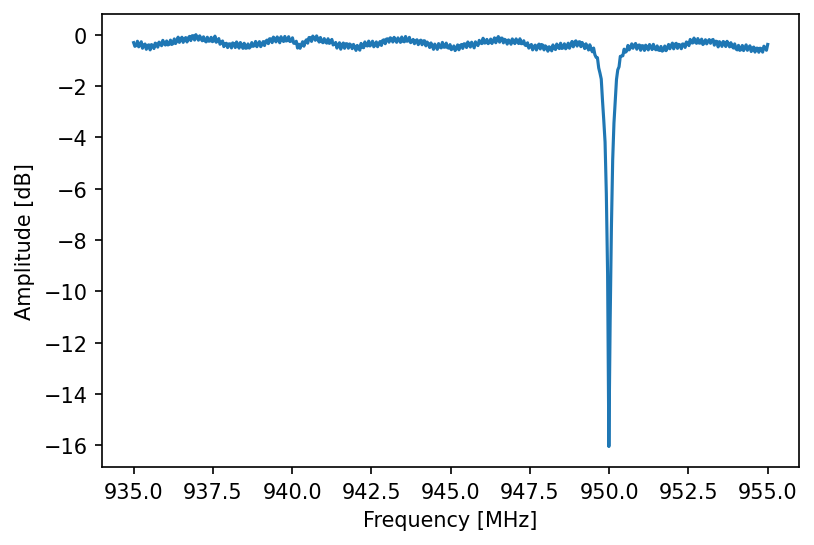

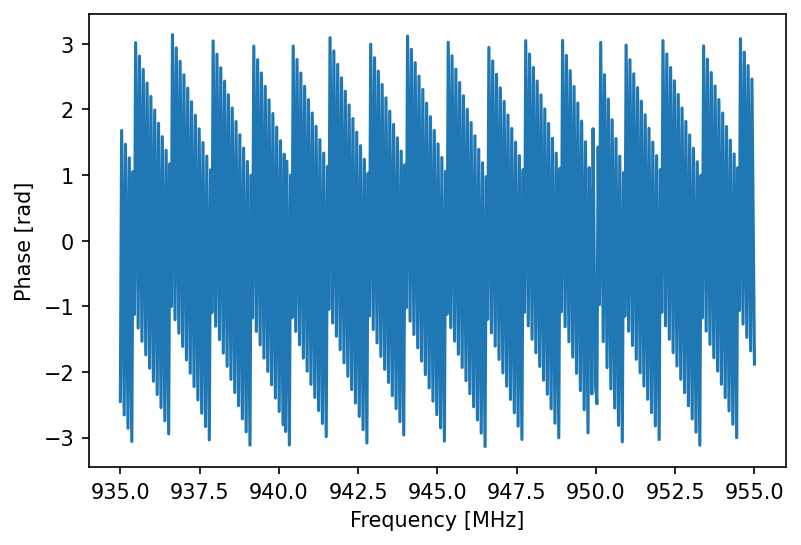

In [8]:
plt.figure(dpi=150)
plt.plot(f,20*np.log10(a/max(a)))
plt.xlabel("Frequency [MHz]");
plt.ylabel("Amplitude [dB]");

plt.figure(dpi=150)
plt.plot(f,phi)
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");